In [22]:
import pandas as pd

df = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
data = df.copy()

In [23]:
data.drop(["Customer ID", "Description"], axis=1, inplace=True)

In [24]:
data["Quantity"] = data["Quantity"].map(lambda x: x if x > 0 else x*-1)
data["Price"] = data["Price"].map(lambda x: x if x > 0 else x*-1)
data[data["Price"] < 0]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country


In [25]:
data["Money Spent"] = data["Price"] * data["Quantity"]
data

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country,Money Spent
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...
541905,581587,22899,6,2011-12-09 12:50:00,2.10,France,12.60
541906,581587,23254,4,2011-12-09 12:50:00,4.15,France,16.60
541907,581587,23255,4,2011-12-09 12:50:00,4.15,France,16.60
541908,581587,22138,3,2011-12-09 12:50:00,4.95,France,14.85


In [26]:
data["Hour"] = data["InvoiceDate"].dt.hour
data["Month"] = data["InvoiceDate"].dt.month
data["Day"] = data["InvoiceDate"].dt.day
data["Year"] = data["InvoiceDate"].dt.year
data[data["Year"] != 2010]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country,Money Spent,Hour,Month,Day,Year
42481,539993,22386,10,2011-01-04 10:00:00,1.95,United Kingdom,19.50,10,1,4,2011
42482,539993,21499,25,2011-01-04 10:00:00,0.42,United Kingdom,10.50,10,1,4,2011
42483,539993,21498,25,2011-01-04 10:00:00,0.42,United Kingdom,10.50,10,1,4,2011
42484,539993,22379,5,2011-01-04 10:00:00,2.10,United Kingdom,10.50,10,1,4,2011
42485,539993,20718,10,2011-01-04 10:00:00,1.25,United Kingdom,12.50,10,1,4,2011
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,6,2011-12-09 12:50:00,2.10,France,12.60,12,12,9,2011
541906,581587,23254,4,2011-12-09 12:50:00,4.15,France,16.60,12,12,9,2011
541907,581587,23255,4,2011-12-09 12:50:00,4.15,France,16.60,12,12,9,2011
541908,581587,22138,3,2011-12-09 12:50:00,4.95,France,14.85,12,12,9,2011


In [27]:
#I want to filter the data to only include the year 2011 and the month 12

data[(data["Year"] == 2011) & (data["Month"] == 12) & (data["Money Spent"] < 0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country,Money Spent,Hour,Month,Day,Year


In [28]:
data[data["Year"] == 2010]["Month"].unique()

array([12])

In [29]:
import matplotlib.pyplot as plt

def spent_during_month(data : pd.DataFrame, month : int, year : int, country = "any"):
    if country == "any":
        daily_spent = data[(data["Year"] == year) & (data["Month"] == month)].groupby("Day")["Money Spent"].sum()
        days = data[(data["Year"] == year) & (data["Month"] == month)]["Day"].unique()
    else: 
        daily_spent = data[(data["Year"] == year) & (data["Month"] == month) & (data["Country"] == country)].groupby("Day")["Money Spent"].sum()
        days = data[(data["Year"] == year) & (data["Month"] == month) & (data["Country"] == country)]["Day"].unique()
    return daily_spent, days


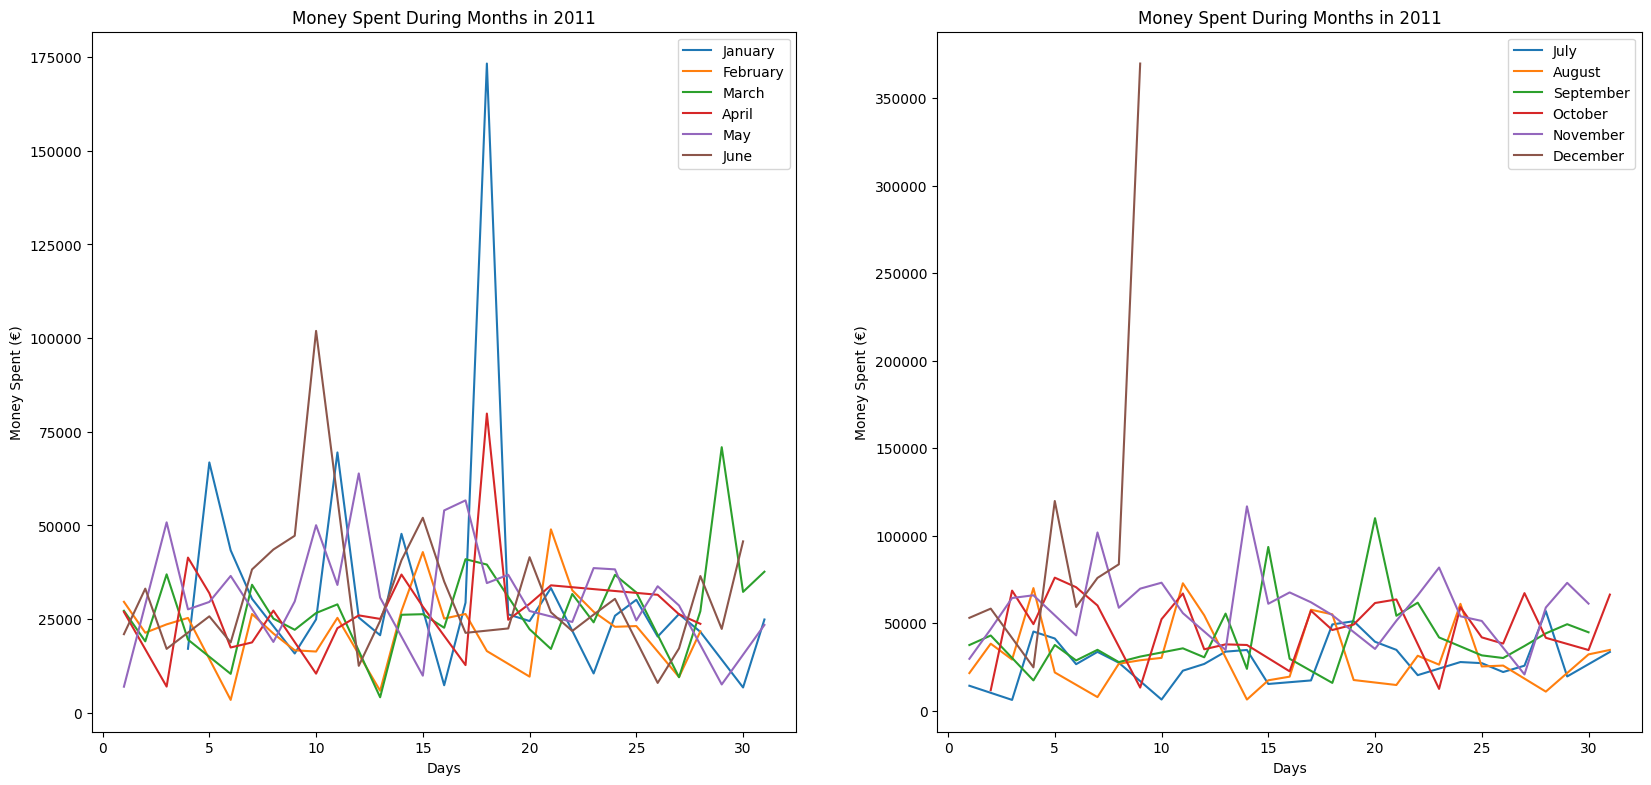

In [30]:
spent_january, days_january = spent_during_month(data, 1, 2011)
spent_february, days_february = spent_during_month(data, 2, 2011)
spent_march, days_march = spent_during_month(data, 3, 2011)
spent_april, days_april = spent_during_month(data, 4, 2011)
spent_may, days_may = spent_during_month(data, 5, 2011)
spent_june, days_june = spent_during_month(data, 6, 2011)
spent_july, days_july = spent_during_month(data, 7, 2011)
spent_august, days_august = spent_during_month(data, 8, 2011)
spent_september, days_september = spent_during_month(data, 9, 2011)
spent_october, days_october = spent_during_month(data, 10, 2011)
spent_november, days_november = spent_during_month(data, 11, 2011)
spent_december, days_december = spent_during_month(data, 12, 2011)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 3)
plt.plot(days_january, spent_january)
plt.plot(days_february, spent_february)
plt.plot(days_march, spent_march)
plt.plot(days_april, spent_april)
plt.plot(days_may, spent_may)
plt.plot(days_june, spent_june)
plt.xlabel("Days")
plt.ylabel("Money Spent (€)")
plt.title("Money Spent During Months in 2011")
plt.legend(["January", "February", "March", "April", "May", "June"])

plt.subplot(2, 2, 4)
plt.plot(days_july, spent_july)
plt.plot(days_august, spent_august)
plt.plot(days_september, spent_september)
plt.plot(days_october, spent_october)
plt.plot(days_november, spent_november)
plt.plot(days_december, spent_december)
plt.xlabel("Days")
plt.ylabel("Money Spent (€)")
plt.title("Money Spent During Months in 2011")
plt.legend(["July", "August", "September", "October", "November", "December"])

CLUSTERING

In [31]:
data_cluster = pd.DataFrame(columns=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December" ], index=range(1, 32))
data_cluster["January"] = spent_january
data_cluster["February"] = spent_february
data_cluster["March"] = spent_march
data_cluster["April"] = spent_april
data_cluster["May"] = spent_may
data_cluster["June"] = spent_june
data_cluster["July"] = spent_july
data_cluster["August"] = spent_august
data_cluster["September"] = spent_september
data_cluster["October"] = spent_october
data_cluster["November"] = spent_november
data_cluster["December"] = spent_december

data_cluster.fillna(0, inplace=True)
data_cluster = data_cluster.T

In [32]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

data_cluster_scaled = scaler.fit_transform(data_cluster)
data_cluster_scaled


array([[-1.40524297e+00, -5.13760122e-01, -5.67218157e-01,
        -3.44100640e-01,  1.15377867e+00,  5.76894902e-01,
        -1.77904671e-01, -2.44630146e+00, -4.85843316e-01,
        -2.05891179e-02,  1.06169460e+00, -9.30231012e-03,
        -1.43771258e-01,  8.95162999e-01, -5.77566511e-01,
        -5.97712392e-01,  3.71881586e-02,  3.40492188e+00,
         6.51569629e-02, -1.75928692e-01, -1.10321493e-02,
        -7.21314971e-01, -6.66312209e-01, -1.26635432e-01,
         2.82412401e-01, -2.74021317e-02,  1.85448670e-01,
        -1.64880588e-01, -1.30086784e-01, -3.40935708e-01,
         3.90329033e-01],
       [ 3.17187320e-01,  2.91838125e-02,  9.11603746e-02,
        -4.21260133e-02, -9.84189758e-01, -8.80377514e-01,
        -3.88858730e-01, -5.30205167e-01, -4.43012328e-01,
        -2.28929310e-01, -1.73054297e-01, -8.14470707e-01,
        -6.64817355e-01, -1.97481244e-01,  5.59012854e-01,
         1.02338264e-01, -3.71881586e-02, -6.86610729e-01,
        -5.93188912e-01, -8.92

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_cluster_scaled, method='ward')
linked

array([[ 1.        ,  2.        ,  3.37783949,  2.        ],
       [ 3.        ,  6.        ,  3.41743227,  2.        ],
       [ 4.        ,  7.        ,  4.37683009,  2.        ],
       [ 5.        , 12.        ,  5.35945752,  3.        ],
       [ 0.        , 13.        ,  5.75195686,  3.        ],
       [14.        , 15.        ,  6.58143469,  5.        ],
       [ 9.        , 16.        ,  7.31294997,  4.        ],
       [ 8.        , 17.        ,  8.24577116,  6.        ],
       [18.        , 19.        ,  8.92534216, 10.        ],
       [10.        , 20.        , 12.70093216, 11.        ],
       [11.        , 21.        , 26.39411437, 12.        ]])

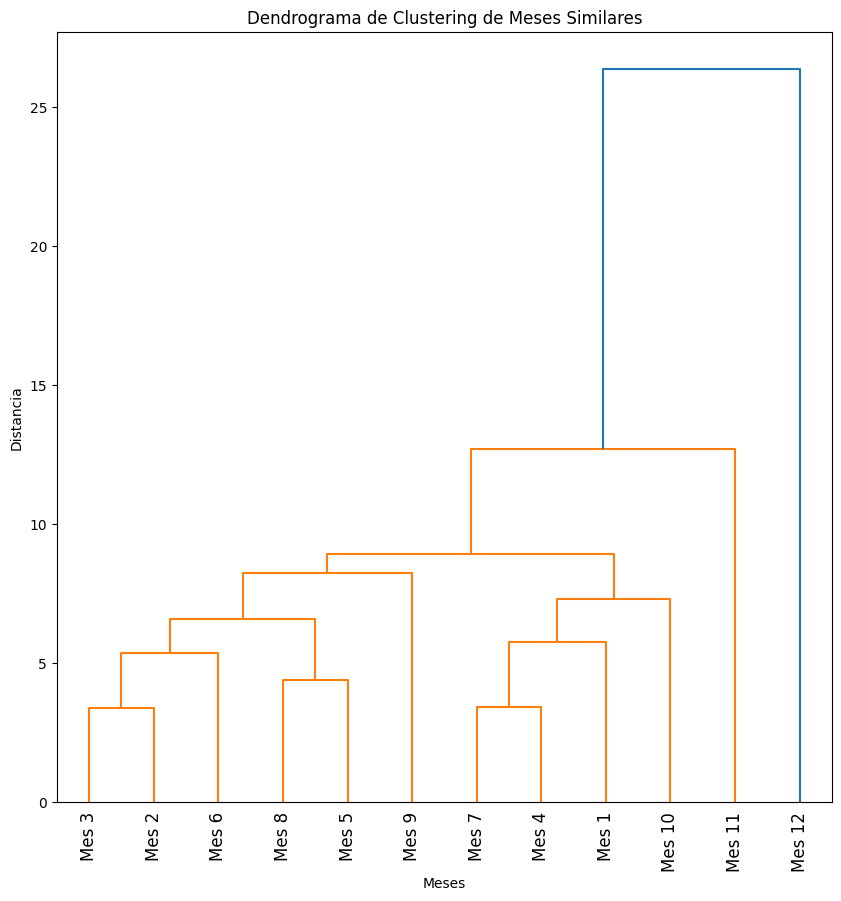

In [34]:

plt.figure(figsize=(10, 10))
dendrogram(linked,
           orientation='top',
           labels=[f'Mes {i+1}' for i in range(12)],  # Etiquetas para los meses
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Clustering de Meses Similares')
plt.xlabel('Meses')
plt.ylabel('Distancia')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

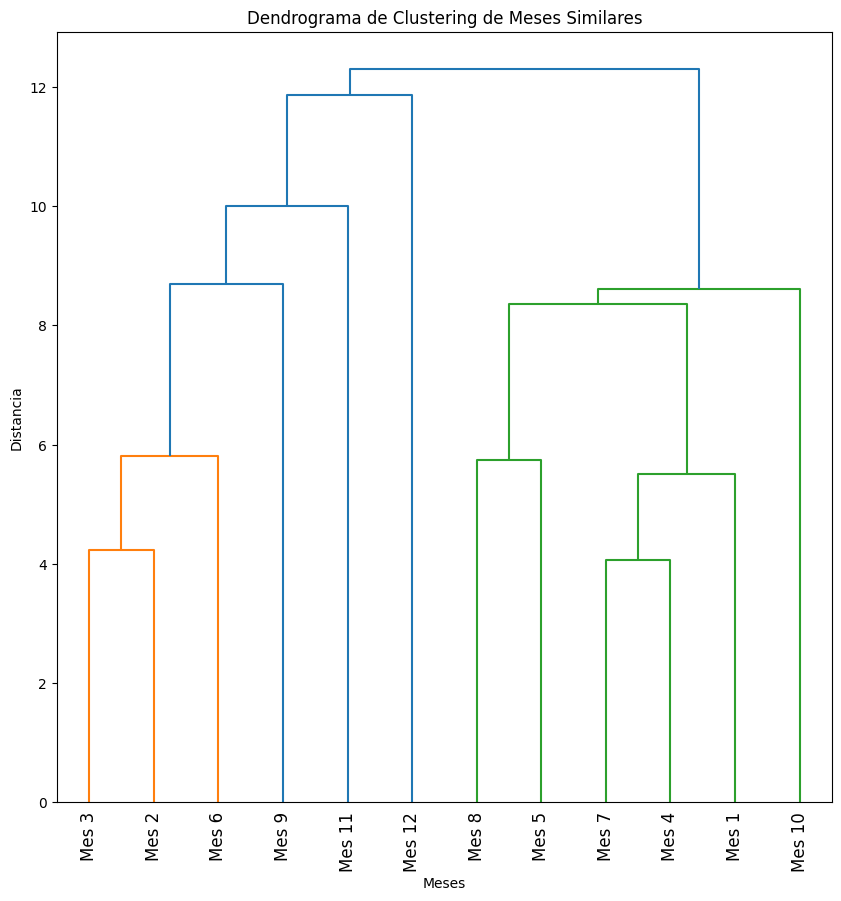

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_cluster_scaled = scaler.fit_transform(data_cluster)

linked = linkage(data_cluster_scaled, method='ward')

plt.figure(figsize=(10, 10))
dendrogram(linked,
           orientation='top',
           labels=[f'Mes {i+1}' for i in range(12)],  # Etiquetas para los meses
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Clustering de Meses Similares')
plt.xlabel('Meses')
plt.ylabel('Distancia')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

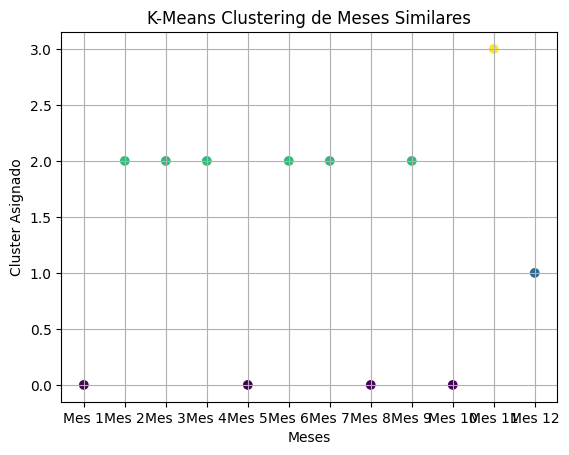

Centroides de los Clusters:
 [[-1.02733868 -0.50724656  0.4938984   0.36831754  0.32480529  0.37492167
  -0.50993566 -0.83608841 -0.32742707  0.22199172  1.02529957  1.05729121
  -0.02396697 -0.34881825 -0.80030238  0.10781221  0.84821482  0.67975206
   0.45866378 -0.17738288 -0.18532683 -0.47053448 -0.09507908  0.78297645
   0.41720239  0.84188788  0.47042591 -0.53518301 -0.67615392 -0.14218371
   0.90571009]
 [ 2.0773305   1.78462651 -1.05590229 -0.44386465  2.42333824  1.41601187
   1.3673024   2.40790974  3.25577622 -1.08893442 -1.50616013 -1.10784945
  -1.37106365 -1.12696699 -1.04686191 -1.1588264  -1.46382205 -1.05869895
  -1.18329307 -1.16693507 -1.58434498 -1.109154   -1.0822649  -1.41700945
  -1.52303838 -1.21994102 -1.27932256 -1.51731474 -0.74606841 -0.99053543
  -0.87800408]
 [ 0.25650249 -0.15904562 -0.42462161 -0.43878335 -0.4361039  -0.59168028
  -0.27427049 -0.05925326 -0.35182406 -0.19081873 -0.56778694 -0.33557765
   0.12482699 -0.05319006  0.51382579 -0.23806947 -0.

In [36]:
from sklearn.cluster import KMeans

k = 4  # Número de clusters deseado
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_cluster_scaled)

# Visualizar los resultados
plt.scatter(range(1, 13), clusters, c=clusters, cmap='viridis')
plt.xlabel('Meses')
plt.ylabel('Cluster Asignado')
plt.title('K-Means Clustering de Meses Similares')
plt.xticks(range(1, 13), [f'Mes {i+1}' for i in range(12)])
plt.grid(True)
plt.show()

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

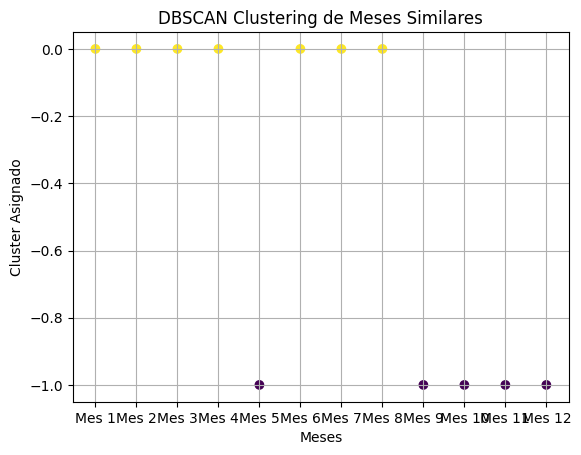

Clusters identificados por DBSCAN: [ 0  0  0  0 -1  0  0  0 -1 -1 -1 -1]


In [37]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=6, min_samples=4, metric="euclidean")  # eps es el radio de alcance, min_samples es el número mínimo de puntos por cluster
clusters_dbscan = dbscan.fit_predict(data_cluster_scaled)

# Visualizar los resultados
plt.scatter(range(1, 13), clusters_dbscan, c=clusters_dbscan, cmap='viridis')
plt.xlabel('Meses')
plt.ylabel('Cluster Asignado')
plt.title('DBSCAN Clustering de Meses Similares')
plt.xticks(range(1, 13), [f'Mes {i+1}' for i in range(12)])
plt.grid(True)
plt.show()

print("Clusters identificados por DBSCAN:", clusters_dbscan)

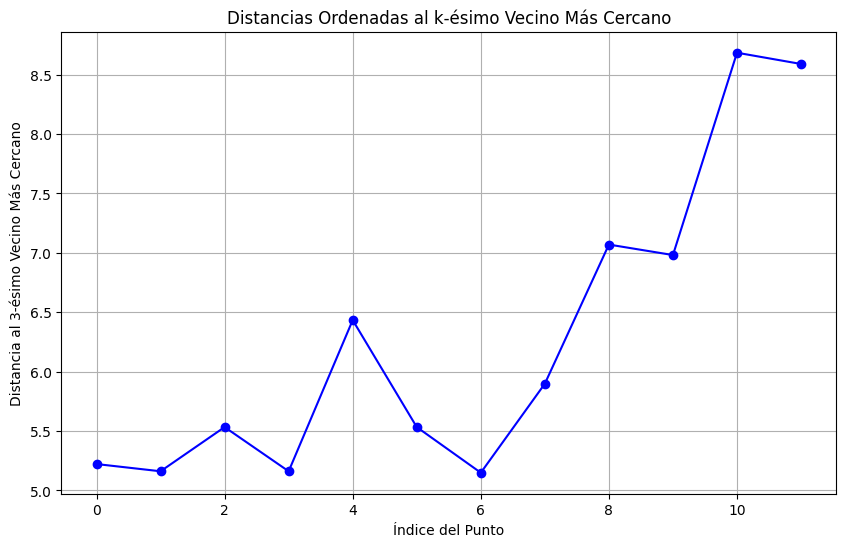

array([[0.        , 5.14916185, 5.22216886],
       [0.        , 4.22479464, 5.16132288],
       [0.        , 4.22479464, 5.53333175],
       [0.        , 4.05739609, 5.16132288],
       [0.        , 5.74720189, 6.43371688],
       [0.        , 5.38550295, 5.53333175],
       [0.        , 4.05739609, 5.14916185],
       [0.        , 5.74720189, 5.89845998],
       [0.        , 6.93322959, 7.06965033],
       [0.        , 6.86068545, 6.98134876],
       [0.        , 8.14326851, 8.68449113],
       [0.        , 8.58684192, 8.58975449]])

In [38]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

k = 3  # Número de vecinos más cercanos
nbrs = NearestNeighbors(n_neighbors=k).fit(data_cluster_scaled)
distances, indices = nbrs.kneighbors(data_cluster_scaled)

# Ordenar las distancias de los k-vecinos más cercanos
# sorted_distances = np.sort(distances[:, k-1])  # Distancia al k-ésimo vecino más cercano

# Graficar las distancias ordenadas
plt.figure(figsize=(10, 6))
plt.plot(distances[:, k-1], marker='o', linestyle='-', color='b')
plt.title('Distancias Ordenadas al k-ésimo Vecino Más Cercano')
plt.xlabel('Índice del Punto')
plt.ylabel(f'Distancia al {k}-ésimo Vecino Más Cercano')
plt.grid(True)
plt.show()
distances